# Data Exploration

Analyzing the [Stack Overflow Developer Survey](https://insights.stackoverflow.com/survey) Results 2021 dataset.


## 🦄 Hypothesis:
1. Woman in Tech involves more in 2021?
3. The compensation gaps between women and men are huge?
4. Do underrepresented countries in the survey like Vietnam tend to have less gender disparity in the Tech community?
5. Higher education to get a higher commission in women?
6. How does frequency participation in other online platforms affect commission?
7. What are the most common languages used by students? How does the list compare with the most common languages used by professional developers?
8. What are the most common job among respondents?
9. What are the most common languages among respondents who work in fields related to data science?
11. What are the most common languages used by developers in your home country?
12. Most of the respondents are a in other online platforms?
13. Percentages of men higher than women in this survey
14. The country has the highest yearly compesation is the USA?

# 💪TASK 2. DATA EXPLORATION 

### Libraries I'll use:

In [1]:
# import libraries general libraries

# work with data in tabular representation
import pandas as pd 
# round the data in the correlation matrix
import numpy as np

# Modules for data visualization
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.graph_objects as go 
import plotly.express as px

from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot, plot #iplot() = plots the figure(fig) that is created by data and layout


# word cloud library
from wordcloud import WordCloud

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

plt.rcParams['figure.figsize'] = [6, 6]

# Ensure that our plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows
%matplotlib inline

# run a python file 
%run assignment1.py

# overwrite the style of all the matplotlib graphs
sns.set()

# ignore DeprecationWarning Eror Messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# check version of Numpy (to create a requirements.txt)
np.__version__

'1.20.1'

In [3]:
# check version of Pandas (to create a requirements.txt)
pd.__version__

'1.3.4'

### Load data

+ Downloaded the csv file and saved it in the working directory as `./Data/survey_results_schema.csv` (questions explanations) and `./Data/survey_results_public` (main data set)

+ Load the CSV data from the file. 

+ Use an appropriate pandas function to load the csv data, and make use of the arguments including sep, decimal, header, etc. if needed.

In [6]:
# import main dataframe
survey_public = pd.read_csv('Data/survey_data_cleaned.csv', sep=',')

# print out first 3 lines of the dataframe
style(survey_public.head(3))

In [42]:
# import main dataframe
survey_public = pd.read_csv('Data/LearnCode.csv', sep=',')

# print out first 3 lines of the dataframe
style(survey_public.head(3))

In [48]:
# import main dataframe
Gender = pd.read_csv('Data/Gender.csv', sep=',')

# print out first 3 lines of the dataframe
style(Gender.head(3))

`survey_question` dataframe below a list of the questions and their options that were asked in the survey, provided by whoever wants the analysis. I read a seperate CSV file to reference this info that I can look at while working.

In [44]:
# import main dataframe
LanguageHaveWorkedWith = pd.read_csv('Data/LanguageHaveWorkedWith.csv', sep=',')

# print out first 3 lines of the dataframe
style(encoded_data.head(3))

In [8]:
# import main dataframe
encoded_data = pd.read_csv('Data/encoded_data.csv', sep=',')

# print out first 3 lines of the dataframe
style(encoded_data.head(3))

In [7]:
# This is for checking the columns in the above dataframe (survey_public) meaning, make qname become index column
survey_question = pd.read_csv('Data/survey_results_schema.csv', sep=',', index_col='qname')

#remove the top unsued rows in the questions schema
survey_question = survey_question.iloc[3:,:]

# print out first 10 lines of the dataframe
survey_question.head(3)

qid                                           question  \
qname                                                                  
MainBranch   QID2  Which of the following options best describes ...   
Employment  QID24  Which of the following best describes your cur...   
Country      QID6  Where do you live? <span style="font-weight: b...   

            force_resp type selector  
qname                                 
MainBranch        True   MC     SAVR  
Employment       False   MC     MAVR  
Country           True   MC       DL

### Data Characteristics
I get the number of rows and columns in our DataFrame by calling `shape`.

In [9]:
# method to find the number of columns is to use .shape, which prints out the full dimensions of the data:
print(f'Dataframe contain {survey_public.shape[0]} records and {survey_public.shape[1]} columns.') # 83439 rows and 48 columns

Dataframe contain 83438 records and 42 columns.


# DATA EXPLORATION 

Explore the provided data based on the following steps:

1. Choose 1 column with nominal values, 1 column with ordinal Values, and 1 column with numerical values. 
(Please try to explore the columns/attributes of potential importance to the analysis, not just a random choice). Then, create a visualization for each of them.

2. Explore the relationships between columns. You need to choose 3 pairs of columns to focus on, and you need to generate 1 visualisation for each pair. Each pair of columns that you choose should address a plausible hypothesis for the data concerned.

3. Build a scatter matrix for all numerical columns. Note, each visualization (graph) should be complete and informative in itself, and should be clear for readers to read and obtain information 

There are two strategies for exploring our data:
+ Statistical calculations
+ Data visualizations

# Task 2.1: Choosing 3 columns - Univariate Statistics
Choose **1 column with nominal** values, **1 column with ordinal** Values, and **1 column with numerical** values. Then, create a visualization for each of them:

+ Explore the columns/attributes of potential importance to the analysis, not just a random choice.

+ You should explore each column with the appropriate type of graphs, for example histograms, barcharts, pie graphs, or boxplots.

+ Format each graph carefully. You need to include appropriate labels on the x-axis and y-axis, a title, and a legend. The fonts should be sized for good readability. Components of the graphs should be coloured appropriately, if applicable.

## 2.1.1 Column with Numerical Values

In [12]:
style(survey_public[['YearsCode','YearsCodePro','ConvertedCompYearly']].corr())

<AxesSubplot:xlabel='YearsCode', ylabel='Density'>

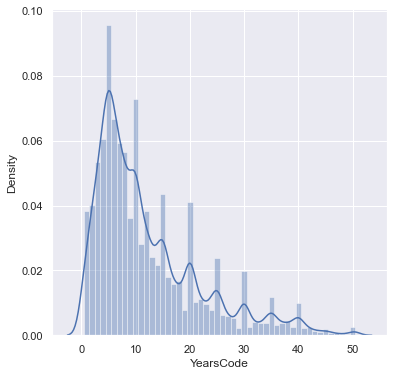

In [13]:
# Get the distribution plot
sns.distplot(survey_public['YearsCode'])

**--->**
#### OBSERVATIONS:

+ The distribution plot tells me that I have a right-skewed variable. In fact from the statistical summary, I already saw that the mean year is about 12 years while 50% of the code years were less than 10 years.

+ When dealing with skewed variables, I reduce the skew of the dataset because it can impact the accuracy of the model. This is an important step if I am going to use linear regression modeling; other algorithms, like tree-based Random Forests can handle skewed data. 

+ I will updated distribution of our target variable once I apply a **log transformation** to it. Applying a log transformation means to simply take the log of the skewed variable to improve the fit by altering the scale and making the variable more normally distributed.

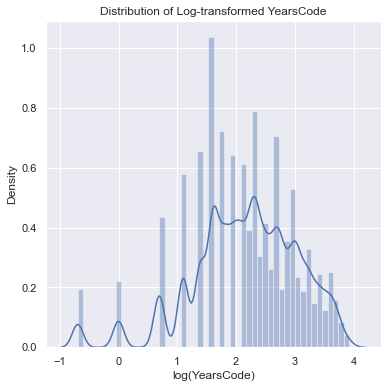

In [10]:
# Take the log to make the distribution more normal
sns.distplot(np.log(survey_public['YearsCode']))
plt.title('Distribution of Log-transformed YearsCode')
plt.xlabel('log(YearsCode)')
plt.show()

**--->**
#### OBSERVATIONS:

+ I can clearly see that the log-transformed variable is more normally distributed and I have managed to reduce the skew.

+ I can plot the distributions of all the numerical variables by calling the `distplot()` method in a for loop

**Correlations Among Numerical Attributes**

Correlation tells us the strength of the relationship between pairs of attributes. In an ideal situation, I would have an independent set of features/attributes, but real data is not ideal. It is useful to know whether some pairs of attributes are correlated and by how much because it is a good practice to remove highly correlated features.

We can use the `corr()` method to easily get the correlations and then visualize them using the heatmap() method

The `corr()` method returns pairs of all attributes and their correlation coefficients in range [-1; 1], where 1 indicates positive correlation, -1 negative correlation and 0 means no relationship between variables at all.

<AxesSubplot:>

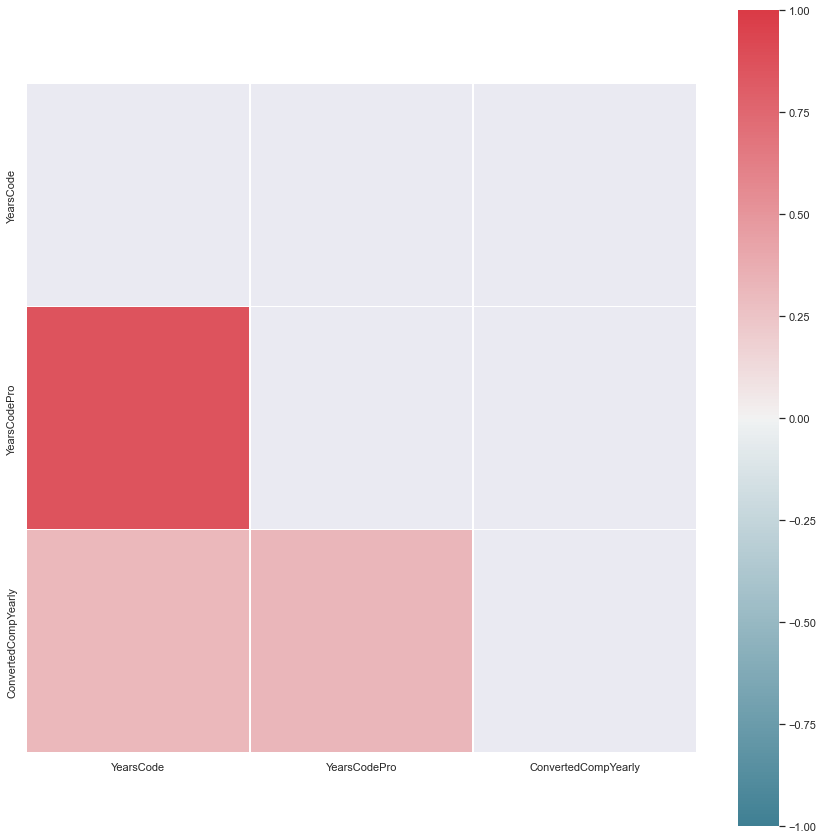

In [14]:
# Correlation of numerical attributes
corr = survey_public.corr()

# Using mask to get triangular correlation matrix
f, ax = plt.subplots(figsize=(15, 15))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, vmin = -1.0, vmax = 1.0, linewidths=.5)


**----->** 
##### OBSERVATIONS

The heatmap is helpful for a first high-level overview relationship for numerical attributes. From the heatmap, I can easily see that I have some variables that are highly correlated with `YearsCodePro` and `YearsCodePro` (darkest red), which makes sense since the longer that ones working on their coding career, the more they become proficient at that skill to become a Pro!

## 2.1.2 Categorical Values

For categorical attributes I do not get a statistical summary. But I can get some important information like number of **unique values and top values for each attribute**. 

For example, I can see that we can have 9 types of `Employment`, with **Employed full-time** being the most frequent type.

### a. Nominal Categories

+ Depending on the data, some of the summary statistics I use for quantitative data can still be meaningful for categorical data. Let’s first consider a nominal categorical variable. 

+ For nominal categorical variables, there is no ordering to the categories. Because of this, I'm limited to using the mode to describe central tendency and there is no way to summarize the spread.

In [15]:
top_country_answered = survey_public['Country'].value_counts().head(10)
top_country_answered

united states of america                                15288
india                                                   10511
germany                                                  5625
united kingdom of great britain and northern ireland     4475
canada                                                   3012
france                                                   2708
brazil                                                   2254
poland                                                   1805
netherlands                                              1772
italy                                                    1666
Name: Country, dtype: int64

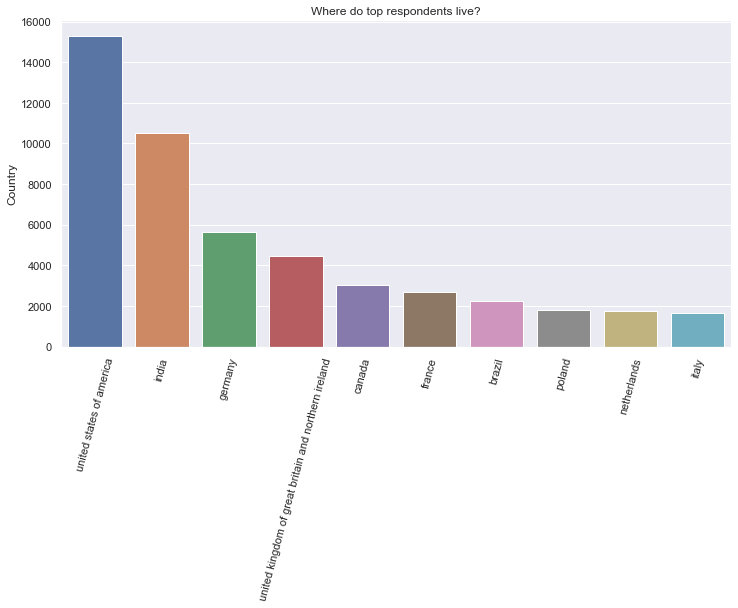

In [16]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("Where do top respondents live?")
sns.barplot(x=top_country_answered.index, y=top_country_answered);

**-------->**
#### OBSERVATIONS:

It appears that a disproportionately high number of respondents are from the US and India, probably because the survey is in English, and these countries have the highest English-speaking populations. We can already see that the survey may not be representative of the global programming community - especially from non-English speaking countries. Programmers from non-English speaking countries are almost certainly underrepresented.


In fact, English is recognized as an official language in a total of 67 different countries, as well as 27 non-sovereign entities. You can use this list of [Overview of English Speaking Countries](https://www.lingoda.com/en/content/english-speaking-countries/).

In [17]:
# get the detail info about the name column for the main data set, later I can access it via slices like a list
survey_question.loc['Language']['question']

'Which <b>programming, scripting, and markup languages</b> have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [45]:
languages_have_worked_dummy_percentages = LanguageHaveWorkedWith.mean().sort_values(ascending=False) * 100
languages_have_worked_dummy_percentages

LanguageHaveWorkedWith_javascript     64.222536
LanguageHaveWorkedWith_html/css       55.439967
LanguageHaveWorkedWith_python         48.986073
LanguageHaveWorkedWith_sql            46.543541
LanguageHaveWorkedWith_java           34.949304
LanguageHaveWorkedWith_node.js        33.527889
LanguageHaveWorkedWith_typescript     29.853304
LanguageHaveWorkedWith_c#             27.546202
LanguageHaveWorkedWith_bash/shell     26.827105
LanguageHaveWorkedWith_c++            24.037010
LanguageHaveWorkedWith_php            21.728709
LanguageHaveWorkedWith_c              20.767516
LanguageHaveWorkedWith_powershell     10.631846
LanguageHaveWorkedWith_go              9.441741
LanguageHaveWorkedWith_kotlin          8.228865
LanguageHaveWorkedWith_rust            6.950071
LanguageHaveWorkedWith_ruby            6.674417
LanguageHaveWorkedWith_dart            5.950526
LanguageHaveWorkedWith_assembly        5.551427
LanguageHaveWorkedWith_swift           5.038472
LanguageHaveWorkedWith_r               5

Text(0.5, 0, 'count')

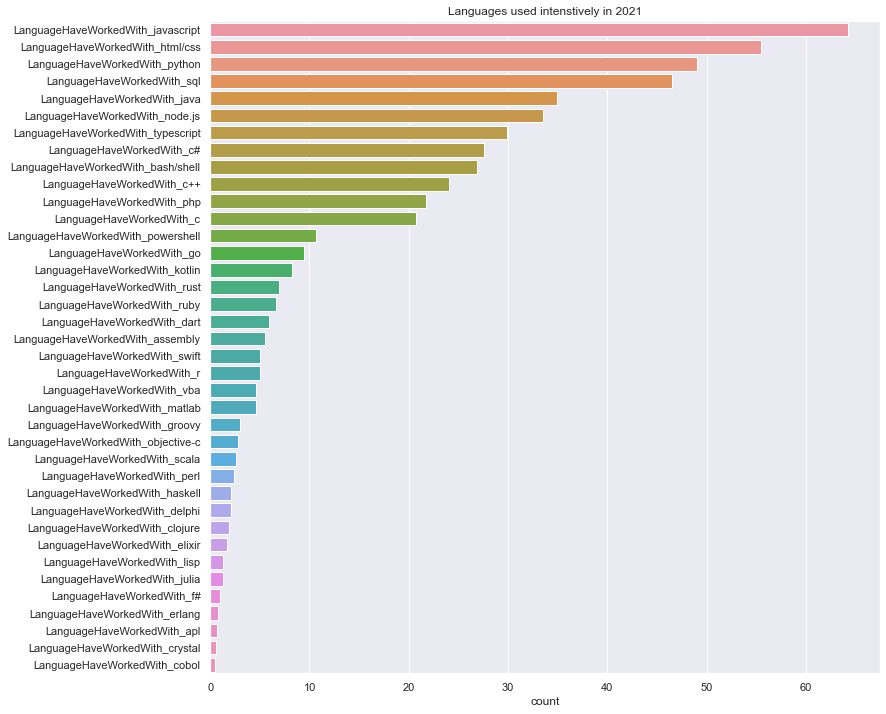

In [46]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_have_worked_dummy_percentages, y=languages_have_worked_dummy_percentages.index)
plt.title("Languages used intenstively in 2021")
plt.xlabel('count')

**----->**
#### OBSERVATIONS:

For web developer, Javascript & HTML/CSS comes out at the top as web development is one of today's most sought skills. It also happens to be one of the easiest to get started. 

For data scientist, SQL and Python have their spot on top. SQL is necessary for working with relational databases and Python seems to be the popular choice for other forms of development.

**[Gender discrepancy on Stack Overflow](https://link.springer.com/article/10.1007/s10664-019-09685-x)**

In [49]:
gender_dummy_percentages = Gender.mean().sort_values(ascending=False) * 100
gender_dummy_percentages

Gender_man                                                  91.780723
Gender_woman                                                 5.239819
Gender_prefer not to say                                     1.728229
Gender_non-binary, genderqueer, or gender non-conforming     1.399842
Gender_in your own words                                     0.906062
dtype: float64

Text(0.5, 0, 'count')

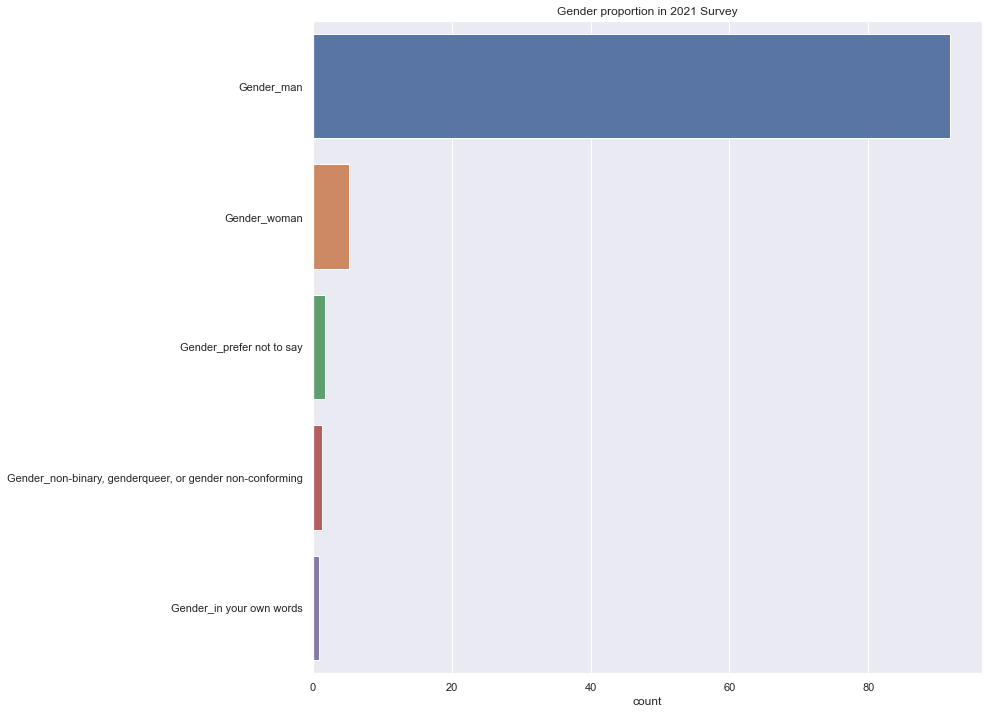

In [50]:
plt.figure(figsize=(12, 12))
sns.barplot(x=gender_dummy_percentages, y=gender_dummy_percentages.index)
plt.title("Gender proportion in 2021 Survey")
plt.xlabel('count')

**----->**
#### OBSERVATIONS:
The massive disparity in gender between men, women, and other gender types of who responded would significantly skew the further gender-tendency analysis.

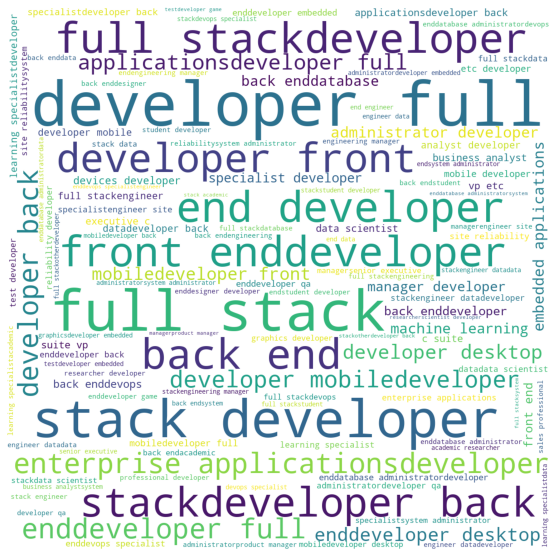

In [19]:
"""
Word Cloud¶: Developer Type base on  most of respondents worked in 2021

WordCloud = word cloud library that I import at the beginning of kernel
background_color = color of back ground
generate = generates the developer types a word cloud
"""

text = str(list(survey_public['DevType'])).replace(',', '').replace(';', '').replace("'", '').replace(']', '')

plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 122).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**------>**
#### OBSERVATIONS:
+ Web developer seems to get the most popular, first is full stack, then front and back end developer. 
+ Data Scientist or Machine Learning specialists are around 5% of those who answered the survey

### b. Ordinal Categorical Variables
+ Ordinal categorical variables have ordered categories. I can calculate **summary statistics** that are not possible for nominal categorical variables. For central tendency, this means we can also calculate a median.

+ In order to calculate numerical statistics for ordered categories, I first assign numerical values to the categories. Consider the variable `EdLevel` from the survey data. I can inspect the unique categories in this variable using `.unique()`:

+ For **ordinal categorical** variables, there is an implied ordering to the categories. In Python, we can use `pd.Categorical()` to transform a variable to a categorical type. The Categorical type allows us to access a numeric value for each category by using `.cat.codes`. From there, we may perform operations on this variable as if it were a regular, numeric variable.

+ However, when calculating statistics for an ordinal categorical variable we should be mindful that some numeric statistics rely on the assumption of **equal spacing** between categories.

+ For ordinal categorical variables, median and mode can be used to summarize the central tendency, and the IQR (or any difference between percentiles) can be used to summarize the spread.

In [20]:
print(list(survey_public['EdLevel'].unique()))

['secondary school', 'bachelor’s degree', 'master’s degree', 'other doctoral degree', 'college/university but no degree', 'something else', 'professional degree', 'primary/elementary school', 'associate degree']


**----->**
#### OBSERVATIONS

+ Then, I can associate each of these categories with a numerical value, indicating an individual’s `education level`. 

+ Convert the variable to type 'category' using `pandas.Categorical()`. When converting a column to type 'category', I can also pass a list with the column’s categories (and True to the ordered parameter) to indicate the desired ordering.

In [21]:
correct_order = ['primary/elementary school', 'secondary school', 'college/university but no degree', 'associate degree', 'bachelor’s degree', 'master’s degree', 'professional degree', 'other doctoral degree', 'something else']

survey_public['EdLevel'] = pd.Categorical(survey_public['EdLevel'], correct_order, ordered=True)

**---------->**
#### OBSERVATIONS
Variables stored as type category have an attribute (`cat.codes`) that converts the categories to numbers. This allows us to perform numerical operations on this categorical field. This allows me to calculate the median category using numpy’s `median()` function:

In [22]:
median_index = np.median(survey_public['EdLevel'].cat.codes)
print(median_index) # Output: 4.0
 
median_category = correct_order[int(median_index)]
print(median_category) # Output: bachelor’s degree

4.0
bachelor’s degree


**-------->**
#### OBSERVATIONS:

+ By using `.cat.codes` on `EdLevel`, I'm able to calculate that the median value for education level is '4' which translates to `associate degree`.

+ While I can represent these categories with equally spaced numbers, there’s not equal spacing between categories. Some gaps between educational attainment levels represent up to four additional years of schooling (e.g. '1st-4th' to '5th-6th'), while others represent a single additional year of schooling (e.g. from '9th' to '10th').

+ When we use .cat.codes to translate these categories into integers, those integers have equal spacing. While translating categories to numbers is often necessary to store and use the order of the categories (for calculating a statistic like the median, which only relies on ordering, not spacing), I should not use those numbers to calculate statistics for which the distance between values matters.


+ The `mean()` and `median()` is not interpretable for ordinal categorical variables because the mean relies on the assumption of **equal spacing** between categories.

+ Many other statistics we might normally use for numerical data rely on the mean. Because of this, these statistics aren’t appropriate for ordinal data. Moreover, The **standard deviation and variance both depend on the mean**, without a mean, I can’t have a reliable standard deviation or variance either!

+ Instead, I can rely on other summary statistics, like the proportion of the data within a range, or percentiles/quantiles. For example, consider the `EdLevel` variable, to calculate a range containing 80% of the data, I can use `np.percentile()`:

In [23]:
tenth_perc_ind = np.percentile(survey_public['EdLevel'].cat.codes, 10)
tenth_perc_cat = correct_order[int(tenth_perc_ind)]
print(tenth_perc_cat) 
 
nintieth_perc_ind = np.percentile(survey_public['EdLevel'].cat.codes, 90)
nintieth_perc_cat = correct_order[int(nintieth_perc_ind)]
print(nintieth_perc_cat)

secondary school
master’s degree


**Formal education to become a programmer?** 
Using horizontal bar plot to visualize the education levels of respondents to gain some insight into this.

**------->**
This tells me that at least 80% of respondents range in `EdLevel` from **secondary school** to a **master’s degree**.

In [24]:
# get the detail info about the name column for the main data set, later I can access it via slices like a list
survey_question.loc['EdLevel']['question']

'Which of the following best describes the highest level of formal education that you’ve completed? *'

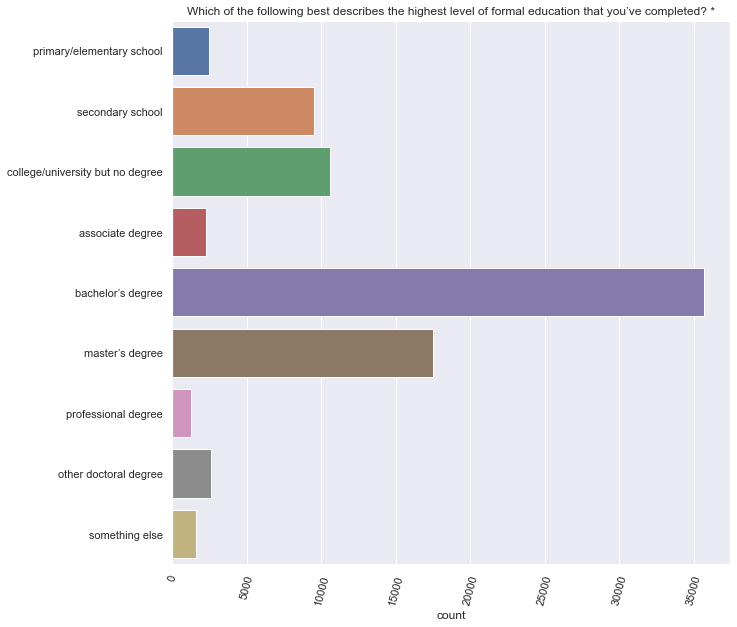

In [25]:
sns.countplot(y=survey_public.EdLevel)
plt.xticks(rotation=75)
plt.title(survey_question.loc['EdLevel']['question'])
plt.ylabel(None);

**--------->**
#### OBSERVATION

+ Over half of the respondents hold a **bachelor's** (as my median prediction) or **master's degree** (as in 80% of my prediction), so most programmers seem to have some college education. However, it's not clear whether they hold a degree in computer science.

+ There are still fair number of people who have not have a university degree yet but still can start their programming carrer due to vast online resouces today. Moreover, as the demand for programming job is still booming, recruiters less likely to look for a degree but more for his projects and skills.

### c. Binary Categorical Variables
Binary categorical variables have only two categories. In Python, these variables are often coded as `0`/`1` or `True`/`False`. This makes it easy to calculate the frequency/proportion of these variables in a dataset. For example, consider a variable a member of any other online developer communities, which is equal to 1 if a person not a member of any other online developer communities, and 0 otherwise. 

In [26]:
# get the detail info about the name column for the main data set, later I can access it via slices like a list
survey_question.loc['NEWOtherComms']['question']

'Are you a member of any other online developer communities?'

In [27]:
survey_public['NEWOtherComms'].value_counts()

no     53974
yes    29464
Name: NEWOtherComms, dtype: int64

In [28]:
member_online_developer_communities_frequency = (survey_public['NEWOtherComms'] == 'yes').sum()
member_online_developer_communities_proportion = (survey_public['NEWOtherComms'] == 'yes').mean()

print("The frequency of is a member any other online developer communities: ", member_online_developer_communities_frequency)
print("the proportion of is a member of any other online developer communities: ", member_online_developer_communities_proportion)

The frequency of is a member any other online developer communities:  29464
the proportion of is a member of any other online developer communities:  0.35312447565857286


**--------->**
#### OBSERVATIONS
Certain summary statistics **(e.g. frequencies and proportions)**, can be used for all categorical variables. 

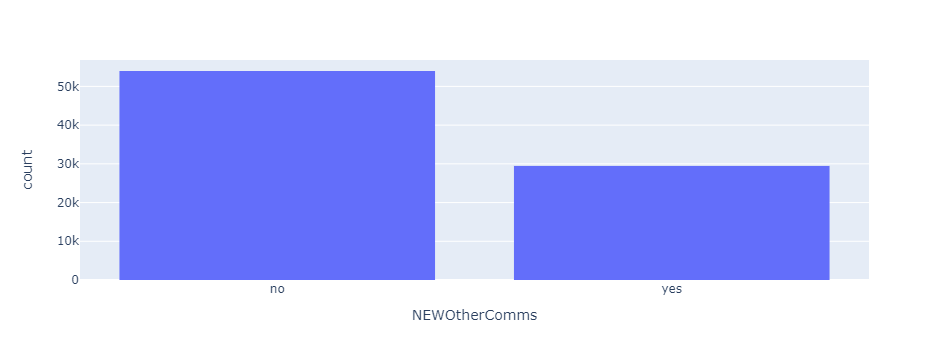

In [29]:
# Are you a member of any other online developer communities using histogram using px for binary answer
fig = px.histogram(survey_public, x = survey_public.NEWOtherComms)
fig.show()

**--------->**
#### OBSERVATIONS

Surprisingly, most of respondents in this survey are not belong to any online developer communities besides Stack Over Flow. This might be because most of them are still newbies in this field.

# Task 2.2: Relationships between columns - Bivariate

+ Explore the relationships between columns. You need to choose **3 pairs of columns** tofocus on, and you need to generate **1 visualisation for each pair**. 

+ Each pair of columns that you choose should address a plausible hypothesis for the data concerned.

+ With each plot, state the **hypothesis** that you are investigating. Then, briefly discuss any interesting relationships (or lack of relationships) that you can observe from your visualisation.

### Bivariate Statistics

In contrast to univariate statistics, bivariate statistics are used to summarize the relationship between two variables. I should choose different summary statistics to answer questions like:

+ Do under represented countries in the survey like Vietnam tend to has less gender disparity in Tech comunity?
+ Higher education to get higher commision in women?
+ How frequency participate in other online platforms affect comisssion?

### 2.2.1. One Quantitative Variable and One Categorical Variable

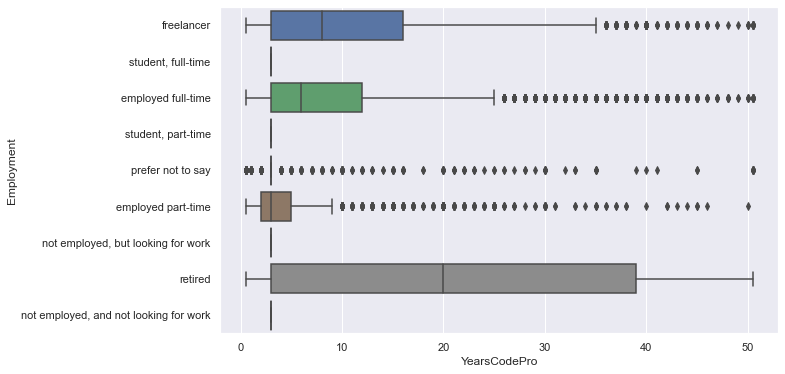

In [30]:
# The impact of Year of code on employment:
var = survey_public['Employment']
f, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x=survey_public.YearsCodePro, y=var)
plt.show()

**---->**
#### OBSERVATIONS:

+ The ones who have longer years of proessionally coded less likely to be a student, unemployed, or look for work. 

+ Most of the people participate in this survey who have prolong coding carrer are whom retired. 

+ Only the minority of people who have 40-50 years of professionally experience are still employed

### 2.2.2 Two Categorical Variables

In [31]:
# Get respondent data where Gender contains 'Woman'

#separate dataframes for men and women
women_df = survey_public.where((survey_public.Gender.str.contains('woman',na=False)), np.nan, inplace=False)
men_df = survey_public.where((survey_public.Gender.str.contains('man',na=False)), np.nan, inplace=False)
men_df.where(~(men_df.Gender.str.contains('woman',na=False)), np.nan, inplace=True)

#survey_df.Gender.value_counts()
men_df.Gender.count()
women_df.Gender.count()

4372

In [32]:
survey_public.Gender.value_counts()

man                                                                              75969
woman                                                                             4120
prefer not to say                                                                 1442
non-binary, genderqueer, or gender non-conforming                                  690
in your own words                                                                  413
man;in your own words                                                              268
man;non-binary, genderqueer, or gender non-conforming                              252
woman;non-binary, genderqueer, or gender non-conforming                            147
man;woman                                                                           41
non-binary, genderqueer, or gender non-conforming;in your own words                 21
man;woman;non-binary, genderqueer, or gender non-conforming                         21
man;woman;non-binary, genderqueer, or gende

In [33]:
women_hobbyist_pct = len(women_df[women_df.NEWOtherComms == 'yes']) * 100 / women_df.Gender.count()
men_hobbyist_pct = len(men_df[men_df.NEWOtherComms == 'yes'])  * 100 / men_df.Gender.count()

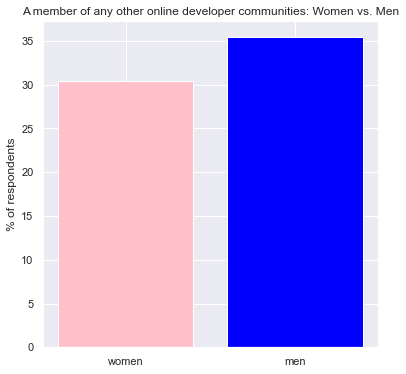

In [34]:
plt.figure(figsize=(6, 6))
plt.title('A member of any other online developer communities: Women vs. Men')
plt.ylabel('% of respondents')
plt.bar(['women', 'men'], [women_hobbyist_pct, men_hobbyist_pct], color=['pink', 'blue']);

**--->** 
#### OBSERVATION:
Surprisingly, the percentage of women who are members of other online developer community approximately equal men.

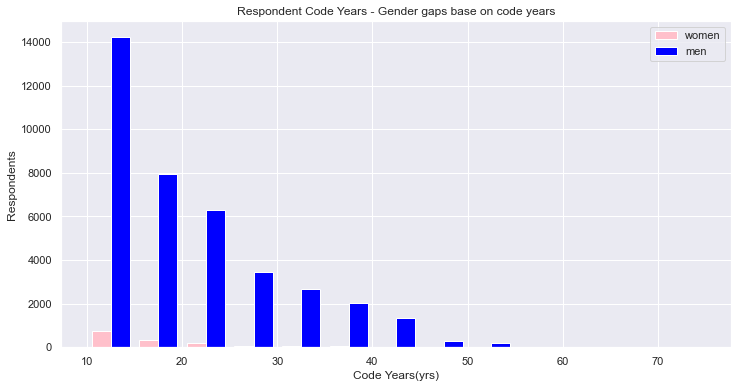

In [35]:
plt.figure(figsize=(12, 6))
plt.title('Respondent Code Years - Gender gaps base on code years')
plt.xlabel('Code Years(yrs)')
plt.ylabel('Respondents')
plt.hist([women_df.YearsCode, men_df.YearsCode], bins=np.arange(10,80,5), color=['pink','blue'], label=['women','men'])
plt.legend(loc='upper right');

**--->** 
#### OBSERVATION:
The graph distribution is right-skewed. The graph shows that the years curves between the genders are similar, but there are noticible differences between women and men coding duration.

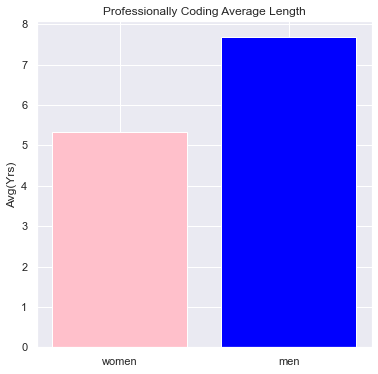

In [36]:
plt.figure(figsize=(6, 6))
plt.title('Professionally Coding Average Length')
plt.ylabel('Avg(Yrs)')
plt.bar(['women', 'men'], [women_df.YearsCodePro.mean(), men_df.YearsCodePro.mean()], color=['pink', 'blue']);

**------>**
#### OBSERVATIONS:
This graph shows that the two bars have a similar shape. The differences are the number of respondents and the number of years.
This may indicate that women tend to have a coding career length shorter than men. This is not because they have less capacity than men, but they might need to take a break to get pregnant and breastfeed.

### 2.2.3 Two Quantitative Variables
I want to know numerical columns are correlated with each other, I am interested in the relationship between `YearsCode` (`YearsCodePro`) and `ConvertedCompYearly`, which are all quantitative. I will show these relationships in task 2.3 Scatter matrix

# Task 2.3: Scatter matrix

In a scatter plot, the values of 2 variables are plotted as points on a 2-dimensional grid. Additionally, I can also use a third variable to determine the size or color of the points. 

+ Build a scatter matrix for all **numerical columns**. 

+ Note, each visualization (graph) should be complete and informative in itself, and should be clear for readers to read and obtain information

In [39]:
# get the detail info about the name column for the main data set, later I can access it via slices like a list
survey_question.loc['CompTotal']['question']

'What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in ${q://QID50/ChoiceGroup/SelectedChoicesTextEntry}? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.'

array([[<AxesSubplot:xlabel='YearsCode', ylabel='YearsCode'>,
        <AxesSubplot:xlabel='YearsCodePro', ylabel='YearsCode'>,
        <AxesSubplot:xlabel='ConvertedCompYearly', ylabel='YearsCode'>],
       [<AxesSubplot:xlabel='YearsCode', ylabel='YearsCodePro'>,
        <AxesSubplot:xlabel='YearsCodePro', ylabel='YearsCodePro'>,
        <AxesSubplot:xlabel='ConvertedCompYearly', ylabel='YearsCodePro'>],
       [<AxesSubplot:xlabel='YearsCode', ylabel='ConvertedCompYearly'>,
        <AxesSubplot:xlabel='YearsCodePro', ylabel='ConvertedCompYearly'>,
        <AxesSubplot:xlabel='ConvertedCompYearly', ylabel='ConvertedCompYearly'>]],
      dtype=object)

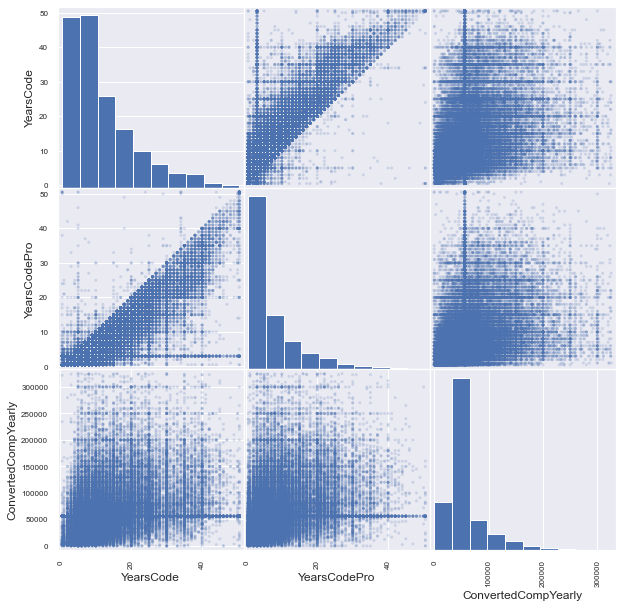

In [40]:
# plot scatter matrix
from pandas.plotting import scatter_matrix
scatter_matrix(survey_public,alpha=0.2,figsize=(10,10),diagonal='hist')

**------->**
##### OBSERVATIONS:

Based on the constructed correlation matrix as well as the constructed visualizations, it can be seen that the data positive correlation between the `YearsCode` and `ConvertedCompYearly` or `YearsCodePro` and `ConvertedCompYearly`.

As the `YearsCode` and `YearsCodePro` getting larger, the `ConvertedCompYearly` varies more (losing the obvious uptrend) indicates that the compensation might be affected by other factors like skills, positions,etc.

Always keep in mind that correlation does not imply causation which Correlation does not capture the direction of the causal relationship. Higher salary is not necessarily a good predictor of number of years coded.



### WRITING DATA BACK TO FILES
After completing your analysis and adding new columns, I write the results back to a file and get that data to visualize on Dash App. Otherwise, the data will be lost when the Jupyter Lab shuts down. 

In [ ]:
# # To write the data from the data frame into a file, use the to_csv function.
# women_df.to_csv('women_df.csv', index=False)
# men_df.to_csv('men_df.csv', index=False)

# Exporting as an Interactive HTML

In [ ]:
!pip install -U kaleido

# fig_ConvertedCompYearly_box.write_html('years_code_box.html')

# Conclusion

+ The higher number of years of coding including education ( or years of professional coding not including education), the higher the yearly compensation is. 

+ The most popular language in 2021 is JavaScript

+ The highest median yearly compensation of all the respondents is San Marino, USA only takes second place

+ Most respondents in this survey are not belong to any online developer communities besides Stack Over Flow

+ Over half of the respondents hold a bachelor's, so most programmers seem to have some formal education. However, it's not clear whether they hold a degree in computer science.

+ Web developer seems to get the most popular: first is full stack, then front and back end developer. 

+ Most of the respondents are man (91.78%)

+ Women tend to have a coding career length shorter than men

Finally, these conclusions can not represent the whole Technology and Engineering community when considering the data generation process. There are many confounding factors to consider, such as demographics, accessibility, languages, etc. Since the survey is in English and asking about one's technical background, programmers from non-English-speaking nations, women, and non-binary genders have provided significantly fewer replies and advatanges.

The data comes from this survey sample could not represent the population using StackOverflow or whole the Technical field. Therefore, I could not prove my sample's analysis 100% infers that the diversity gap is severely vast in programming community is true. However, I am confident that the inferences are not false due to how the random and great sample size of the survey was collected. Most importly, people should continue to assist and promote underrepresented populations, regardless of age, nationality, ethnicity, gender, or other factors.

I would recommend Stack Overflow to increase the inclusivity by translating the survey into multiple languages.

# References

#### Official Documentation

+ [Python Standard Library](https://docs.python.org/3/library/)
    
+ [Matplotlib](https://matplotlib.org) 
    
+ [Seaborn](https://seaborn.pydata.org)

+ [NumPy: the absolute basics for beginners](https://numpy.org/doc/stable/user/absolute_beginners.html)

+ [Tidy Data by Hadley Wickham](http://vita.had.co.nz/papers/tidy-data.pdf)

+ [What is EDA](https://www.itl.nist.gov/div898/handbook/eda/section1/eda11.htm)
    
+ [Book: Whirlwind Tour of Python, Jake VanderPlas](https://jakevdp.github.io/WhirlwindTourOfPython/08-defining-functions.html#Anonymous-(lambda)-Functions)



#### Towards datas cience:

+ [Working with missing values in Pandas](https://towardsdatascience.com/working-with-missing-values-in-pandas-5da45d16e74)

+ [10 tricks for converting Data to a Numeric Type in Pandas](https://towardsdatascience.com/converting-data-to-a-numeric-type-in-pandas-db9415caab0b)

+ [How To Change Column Type in Pandas DataFrames](https://towardsdatascience.com/how-to-change-column-type-in-pandas-dataframes-d2a5548888f8)

+ [Dealing with extra white spaces while reading CSV in Pandas](https://towardsdatascience.com/dealing-with-extra-white-spaces-while-reading-csv-in-pandas-67b0c2b71e6a)


#### More:
+ [Imputing Missing Data: Playing with Fire](https://www.linkedin.com/pulse/imputing-missing-data-playing-fire-jehan-gonsal/)

+ [Supported data types in PyTables](https://www.pytables.org/usersguide/datatypes.html)
    
+ [Missing Data in Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)
         
+ [A Simple Tutorial on Exploratory Data Analysis](https://www.kaggle.com/spscientist/a-simple-tutorial-on-exploratory-data-analysis)

+ [The Data Visualisation Catalogue](https://datavizcatalogue.com/)

+ [Documentation: API reference — seaborn](https://seaborn.pydata.org/api.html)
    
+ [Structure of a Data Analysis Report](http://www.stat.cmu.edu/~brian/701/notes/paper-structure.pdf)
    
+ [How to write data analysis reports. Lesson -2 know your audience.](https://bigdata-madesimple.com/write-data-analysis-reports-lesson-2-know-audience/)

+ [Ban Bossy](https://banbossy.com/)
    
- [Other encoding techniques with category_encoder](https://contrib.scikit-learn.org/category_encoders/)

- [Categorical data with big data using pyspark](https://towardsdatascience.com/feature-encoding-with-spark-2-3-0-part-1-9ede45562740)

- [More on Categorical_encoding](https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/)
    
+ [Python for Data Analysis (book by Wes McKinney - creator of Pandas](https://www.oreilly.com/library/view/python-for-data/9781491957653/)
    
+ [Girls Who Code](https://girlswhocode.com/)

+ [Girls will Code | Isabel Sieh | TEDxBritishSchoolManila](https://www.youtube.com/watch?v=YQDXpu3t7Og&ab_channel=TEDxTalks)